In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/credit.csv')

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
credit_df.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard


Num_Bank_Accounts : 몇 개의 계좌가 있는지?

Num_Credit_Card : 카드가 몇개 있는지?

Interest_Rate : 이자율

Num_of_Loan : 대출이 몇개 있는가?

Type_of_Loan : 대출 형태

Delay_from_due_date : 몇일이나 연체되었는가?

Num_of_Delayed_Payment : 연체된 건수가 몇 건이나 있는지?

Num_Credit_Inquiries : 대출 신청 시 해당회사에서 신용 조회 ( 너무 높으면 문제 있음)

Outstanding_Debt : 총 부채

Credit_Utilization_Ratio : 한도에 대한 사용 비율

Credit_History_Age : Credit_Score 가 발생한 시점부터 얼마나 지났는지?
                    (처음 크레딧 카드를 받은 시점, 대출을 받은 시점)
                     즉 기간이 오래되어 있을수록 크레딧 스코어 올릴 수 있음.

Payment_of_Min_Amount : 최소 금액만 지불하는 방식의 크레딧 카드
                        100만원 중에 30만원만 갚고 나머지는 다음달로 계속 연체 시키는 그런 시스템을 사용하는 가에 대한 여부

Total_EMI_per_month : EMI은 균등상한분할 대출 받았을 떄 월별로 얼마를 갚는지?

Amount_invested_monthly	: 월별 투자금액

Payment_Behaviour : 얼만큼 쓰고 얼만큼 갚는지

Monthly_Balance	: 월별 내야 하는 금액

In [5]:
credit_df.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [7]:
credit_df['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [8]:
credit_df['Credit_Score'] = credit_df['Credit_Score'].replace({'Poor':0,'Standard':1,'Good':2})

In [9]:
credit_df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


<Axes: xlabel='Payment_of_Min_Amount', ylabel='Credit_Score'>

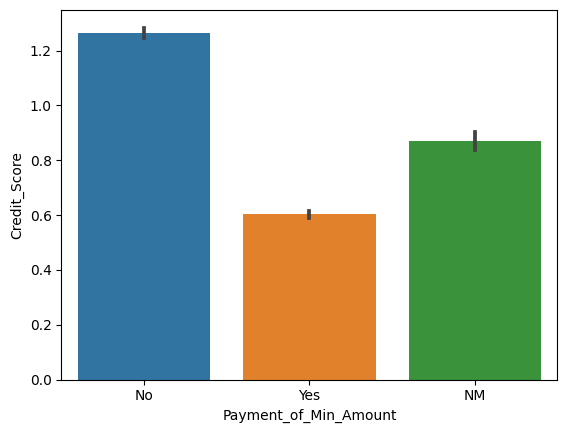

In [10]:
sns.barplot(x='Payment_of_Min_Amount',y='Credit_Score',data=credit_df)

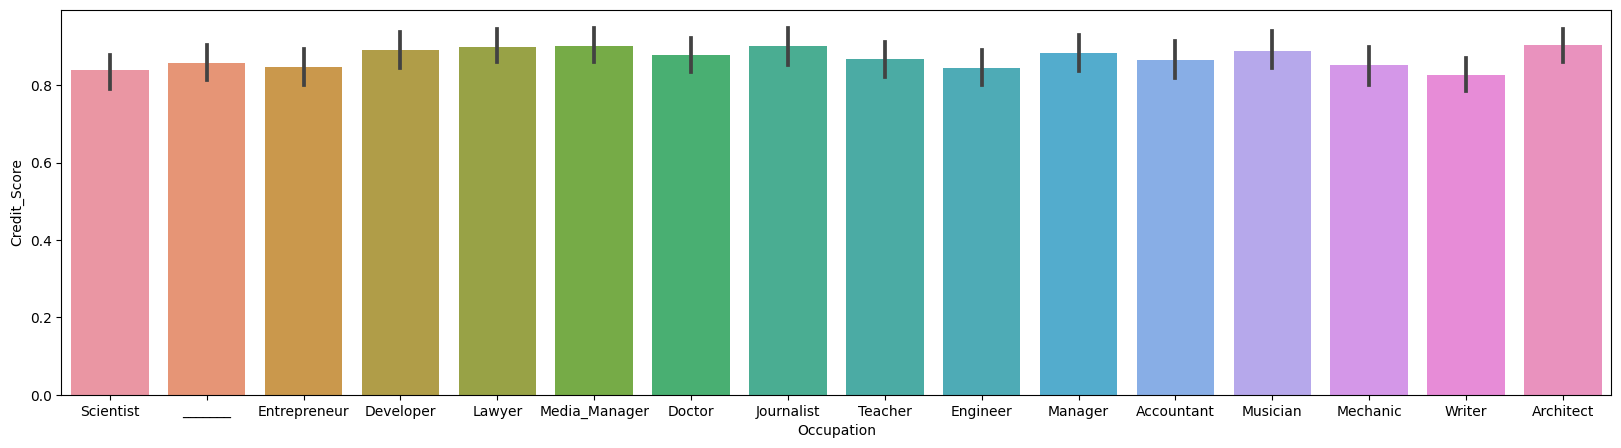

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x='Occupation',y='Credit_Score',data=credit_df)
plt.show()

<ipython-input-12-9a7a2861b2e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)


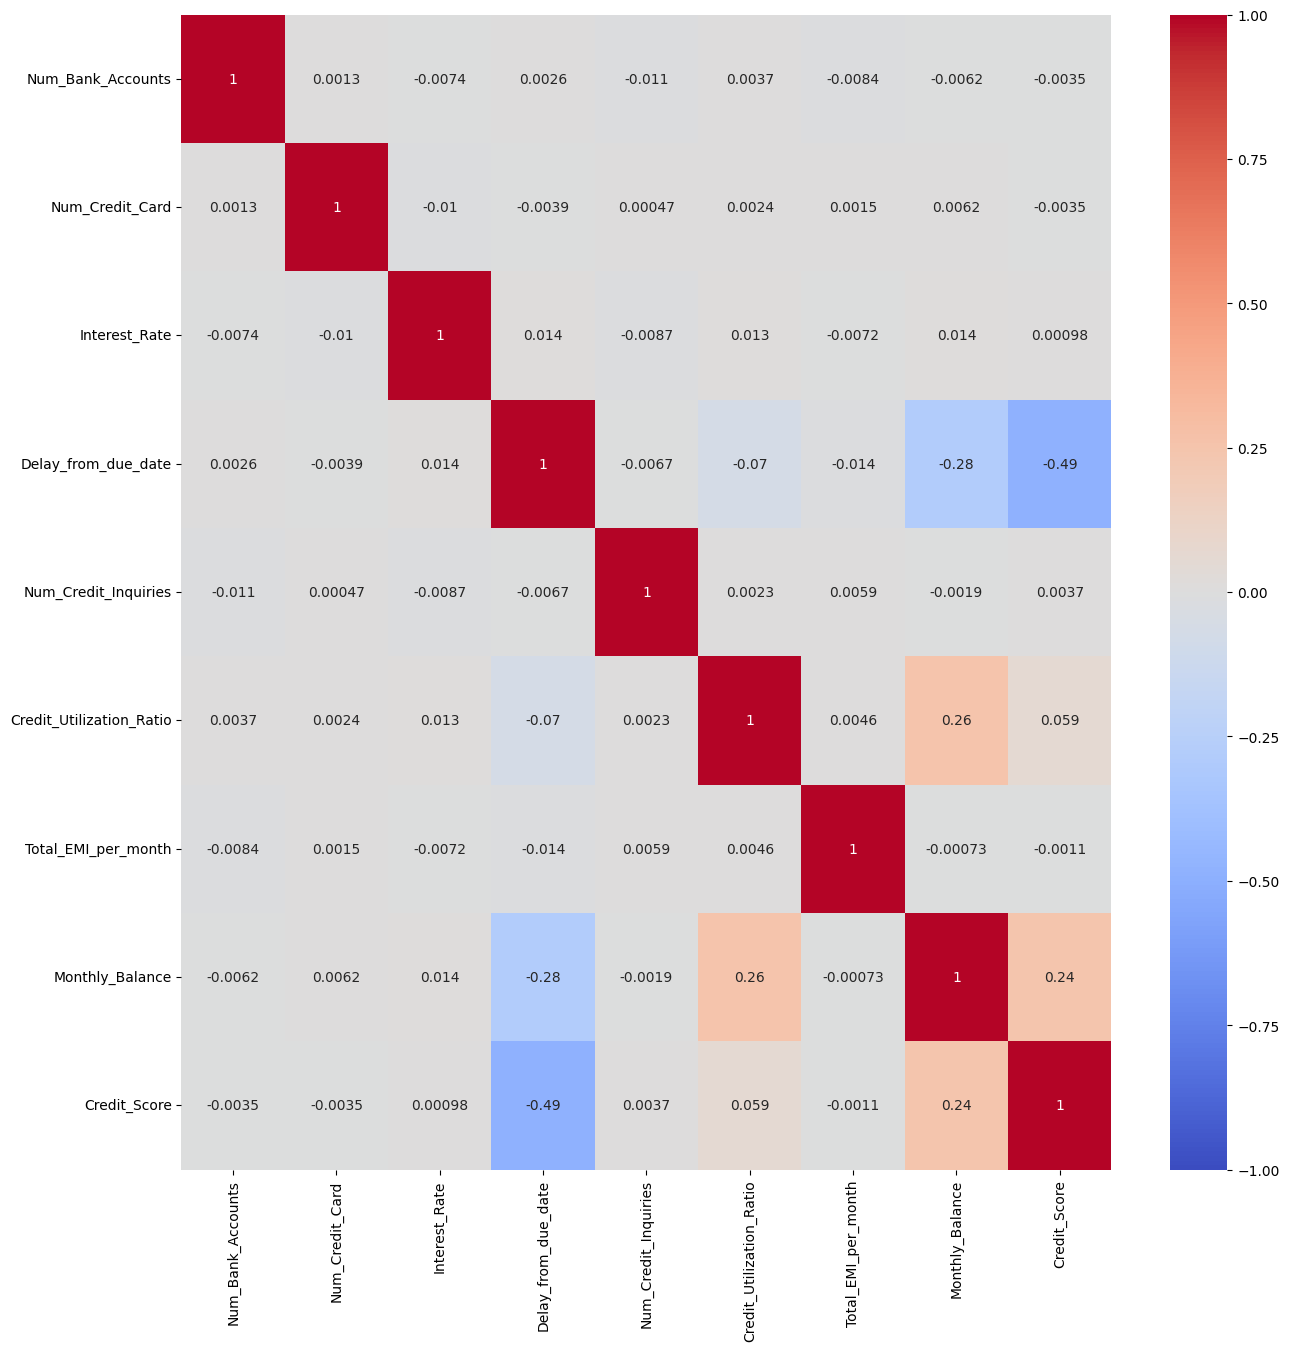

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(credit_df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.show()

# Data Cleaning

In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [14]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [15]:
for i in credit_df.columns:
    if credit_df[i].dtype == 'O':
        print(i)

Age
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour


In [16]:
['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly']

['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Amount_invested_monthly']

In [17]:
'text_'.replace('_','')

'text'

In [18]:
for i in ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly']:
    credit_df[i] = pd.to_numeric(credit_df[i].str.replace('_',''))

#판다스 시리즈에서 replace를 붙이면 각각의 값들을 확인해서 이것과 일치하면 이것과 바꿔줌. ->str 붙여줘야 함.

In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  int64  
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  float64
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [20]:
credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].str.replace(' Months','')

In [21]:
'sample text'.split()

['sample', 'text']

In [22]:
credit_df['Credit_History_Age'].str.split(' Years and ')

0        [22, 1]
1        [26, 7]
2        [17, 9]
3        [17, 3]
4        [30, 8]
          ...   
12495    [28, 1]
12496        NaN
12497    [29, 9]
12498     [5, 8]
12499    [31, 3]
Name: Credit_History_Age, Length: 12500, dtype: object

In [23]:
credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)

,0,1
0,22,1
1,26,7
2,17,9
3,17,3
4,30,8
...,...,...
12495,28,1
12496,NaN,NaN
12497,29,9
12498,5,8


In [24]:
credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)[0] * 12

0        222222222222222222222222
1        262626262626262626262626
2        171717171717171717171717
3        171717171717171717171717
4        303030303030303030303030
                   ...           
12495    282828282828282828282828
12496                         NaN
12497    292929292929292929292929
12498                555555555555
12499    313131313131313131313131
Name: 0, Length: 12500, dtype: object

In [25]:
credit_df['Credit_History_Age'] = pd.to_numeric(credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)[0]) * 12 + pd.to_numeric(credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)[1])

In [26]:
credit_df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,368.0,Yes,0.000000,276.725394,!@9#%8,288.605522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,18,Lawyer,42903.79,0,4,6,1,Not Specified,14,0.0,1.0,1079.48,27.289440,337.0,No,50894.000000,78.514945,High_spent_Small_value_payments,493.341182,2
12496,44,Media_Manager,16680.35,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",4,0.0,4.0,897.16,39.868572,NaN,NM,41.113561,52.951978,High_spent_Small_value_payments,318.737378,2
12497,49,Writer,37188.10,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12.0,3.0,620.64,39.080823,357.0,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,2
12498,28,Architect,20002.88,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,26.0,9.0,3571.70,22.895966,68.0,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,0


# 이상 데이터 처리

In [27]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.00000,12500.00000,12500.000000,11657.000000,12264.000000,12500.000000,12500.000000,11387.000000,12500.000000,11935.000000,12366.000000,12500.000000
mean,113.371280,1.888617e+05,17.275120,21.647680,69.46520,3.43656,21.051440,31.280089,24.591650,1426.220376,32.291949,217.588127,1303.781040,643.291976,405.815391,0.871440
std,691.223297,1.482707e+06,118.518214,123.789969,455.95698,65.35565,14.859994,229.911798,183.422458,1155.169458,5.084327,99.638681,8118.261086,2063.324328,218.136964,0.654268
min,-500.000000,7.005930e+03,0.000000,1.000000,1.00000,-100.00000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.948777e+04,3.000000,4.000000,8.00000,1.00000,10.000000,9.000000,2.000000,566.072500,28.110034,141.000000,29.128806,73.810753,271.785749,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.00000,3.00000,18.000000,14.000000,4.000000,1166.155000,32.297912,215.000000,66.372879,134.201478,337.169588,1.000000
75%,42.000000,7.289813e+04,7.000000,7.000000,20.00000,5.00000,28.000000,18.000000,8.000000,1945.962500,36.458660,298.000000,149.904496,264.555831,475.222487,1.000000
max,8592.000000,2.365819e+07,1779.000000,1479.000000,5788.00000,1496.00000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [28]:
credit_df = credit_df[ credit_df['Age'] >= 0 ]

In [29]:
credit_df.sort_values('Age').tail(50)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3030,6796,Accountant,32401.400,8,5,29,6,"Payday Loan, Mortgage Loan, Payday Loan, Payda...",41,22.0,8.0,4607.43,32.353246,107.0,Yes,14741.000000,10000.000000,Low_spent_Large_value_payments,284.685362,0
582,6846,Accountant,10299.565,5,9,28,2,"Auto Loan, and Not Specified",22,19.0,8.0,1710.58,37.571471,175.0,Yes,8.724971,30.547856,Low_spent_Small_value_payments,321.956882,0
5559,6863,Mechanic,58416.360,6,6,29,5,"Credit-Builder Loan, Home Equity Loan, Mortgag...",52,27.0,11.0,1300.14,32.375318,135.0,Yes,224.204701,248.985936,High_spent_Small_value_payments,274.512363,0
8885,6902,Musician,116742.540,5,3,10,2,"Payday Loan, and Credit-Builder Loan",5,4.0,2.0,295.19,30.488264,335.0,No,186.726035,227.470733,High_spent_Large_value_payments,818.257732,2
7773,6909,_______,36825.110,5,3,9,1,Mortgage Loan,28,12.0,1.0,520.36,27.670760,219.0,No,24.319836,103.993523,Low_spent_Medium_value_payments,451.462558,0
5093,6971,Mechanic,70709.040,7,6,20,6,"Home Equity Loan, Mortgage Loan, Student Loan,...",9,15.0,5.0,805.64,22.985417,NaN,Yes,260.883512,203.693569,High_spent_Medium_value_payments,344.664919,1
3257,6995,Teacher,126530.400,1,5,5,2,"Credit-Builder Loan, and Auto Loan",18,3.0,3.0,953.26,27.883289,333.0,No,140.492402,183.181709,High_spent_Large_value_payments,969.845888,2
4678,7014,Scientist,85486.140,6,4,13,3,"Not Specified, Student Loan, and Not Specified",20,6.0,3.0,380.26,39.843984,313.0,Yes,177.172430,245.061798,High_spent_Medium_value_payments,568.950272,1
9916,7171,Teacher,30951.640,9,5,26,7,"Credit-Builder Loan, Student Loan, Home Equity...",34,18.0,6.0,4972.87,39.246981,109.0,Yes,103.030041,95.670699,Low_spent_Small_value_payments,320.429593,1
2105,7197,Manager,10640.355,6,3,13,2,"Credit-Builder Loan, and Credit-Builder Loan",14,18.0,3.0,76.19,29.374412,281.0,Yes,17.315030,68.909662,Low_spent_Large_value_payments,295.344933,1


<Axes: ylabel='Age'>

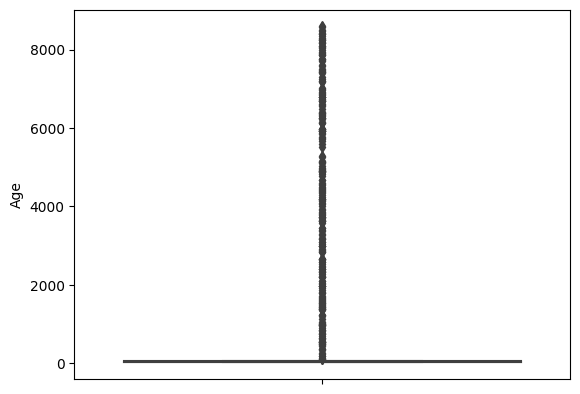

In [30]:
sns.boxplot(y=credit_df['Age'])

In [31]:
credit_df[credit_df['Age']>80].sort_values('Age')
#120세 이상 날리자!

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4781,95,Engineer,46162.62,10,5,16,2,"Personal Loan, and Debt Consolidation Loan",43,19.0,6.0,1788.63,35.386419,185.0,Yes,65.956819,288.645844,Low_spent_Small_value_payments,290.285837,1
3911,102,Musician,38460.28,6,9,16,7,"Personal Loan, Personal Loan, Home Equity Loan...",56,16.0,11.0,4106.50,26.537577,73.0,Yes,179.135821,267.336505,Low_spent_Medium_value_payments,157.630007,1
2416,126,Teacher,22050.56,5,4,12,1,Home Equity Loan,5,13.0,4.0,37.42,28.956967,387.0,NM,13.485884,NaN,High_spent_Medium_value_payments,359.927004,1
7418,169,Doctor,50109.76,6,3,4,1,Personal Loan,16,17.0,0.0,893.62,27.560776,191.0,NM,22.847438,351.547678,Low_spent_Large_value_payments,331.086217,2
952,181,_______,87957.02,2,5,9,4,"Home Equity Loan, Auto Loan, Credit-Builder Lo...",9,1.0,2.0,811.01,41.470014,231.0,No,195.913703,265.660815,High_spent_Medium_value_payments,533.800649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,8425,Writer,18512.97,7,5,18,3,"Student Loan, Student Loan, and Mortgage Loan",15,11.0,6.0,1366.56,29.253092,131.0,Yes,24.621173,63.282651,High_spent_Medium_value_payments,311.570927,1
11218,8481,Journalist,15874.01,1,3,5,0,NaN,12,6.0,1.0,1173.38,24.443887,380.0,No,0.000000,53.610174,High_spent_Small_value_payments,311.373243,0
12439,8490,Lawyer,150131.68,5,1,4,0,NaN,8,-2.0,0.0,1138.36,30.013470,376.0,No,0.000000,949.847265,Low_spent_Small_value_payments,599.850069,1
9255,8587,Journalist,28286.24,4,7,7,1,Mortgage Loan,18,16.0,4.0,1406.94,33.599043,350.0,No,17.431672,41.114532,High_spent_Medium_value_payments,418.772462,1


In [32]:
credit_df = credit_df[credit_df['Age']<120]

In [33]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12126.000000,1.212600e+04,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,11304.000000,11892.000000,12126.000000,12126.000000,11045.000000,12126.000000,11584.000000,11995.000000,12126.000000
mean,33.049398,1.897604e+05,17.275606,21.458601,68.507917,3.179861,21.053604,31.464084,24.994871,1426.321231,32.293466,217.614396,1308.972585,641.812701,406.077932,0.870856
std,10.810043,1.486221e+06,118.546216,122.910157,453.592030,64.030581,14.857112,230.020040,185.478101,1155.255348,5.084805,99.405014,8131.974016,2059.907639,218.484165,0.653729
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.945750e+04,4.000000,4.000000,8.000000,1.000000,10.000000,9.000000,2.000000,565.967500,28.118929,141.000000,29.275040,73.698246,271.752715,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.555000,32.285050,215.000000,66.196875,134.363758,337.123394,1.000000
75%,41.000000,7.305204e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1945.677500,36.452073,297.000000,149.873130,265.384383,474.903731,1.000000
max,102.000000,2.365819e+07,1779.000000,1479.000000,5788.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [34]:
len(credit_df[credit_df['Num_Bank_Accounts']>15]) / len(credit_df)

0.013029853207982847

In [35]:
credit_df = credit_df[credit_df['Num_Bank_Accounts'] <= 15]
#상식적인 수준은 아니지만 얼추 감으로 15에서 끊음.

In [36]:
len(credit_df[credit_df['Num_Credit_Card']>20]) / len(credit_df)

0.021975267379679145

In [37]:
credit_df = credit_df[credit_df['Num_Credit_Card'] <= 20]

In [38]:
credit_df = credit_df[credit_df['Interest_Rate'] <= 40]

In [39]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11489.000000,1.148900e+04,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,10697.000000,11272.000000,11489.000000,11489.000000,10456.000000,11489.000000,10976.000000,11365.000000,11489.000000
mean,33.051005,1.866428e+05,5.379058,5.539473,14.581774,3.085299,21.071111,32.144433,25.610628,1428.023787,32.274542,217.205337,1309.664252,643.204912,405.469860,0.869005
std,10.806912,1.473204e+06,2.592378,2.073895,8.769424,63.606989,14.867793,235.555903,188.942465,1156.841447,5.081960,99.622916,8147.400974,2063.638237,217.870485,0.652951
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.939932e+04,3.000000,4.000000,7.000000,1.000000,10.000000,9.000000,2.000000,565.280000,28.109667,140.000000,29.579944,73.167755,271.696442,0.000000
50%,33.000000,3.747152e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.470000,32.257865,215.000000,66.140607,133.820509,336.826381,1.000000
75%,41.000000,7.288608e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1950.620000,36.403191,297.000000,149.469529,263.650717,474.571468,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,34.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [40]:
credit_df = credit_df[credit_df['Num_of_Loan'] >= 0]

<Axes: ylabel='Num_of_Loan'>

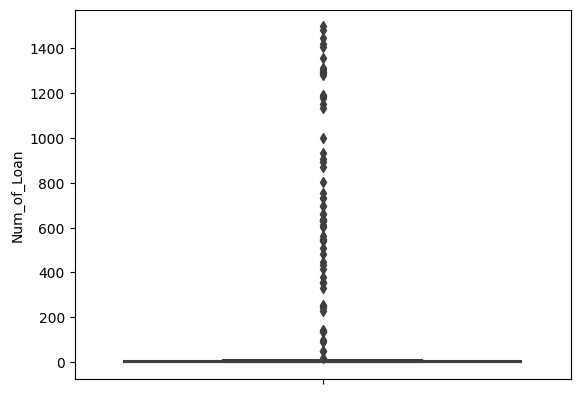

In [41]:
sns.boxplot(y=credit_df['Num_of_Loan'])

In [42]:
credit_df = credit_df[credit_df['Num_of_Loan'] <= 10]

In [43]:
credit_df.sort_values('Num_of_Delayed_Payment',ascending=False).head(50)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10279,50,Scientist,32637.880,5,5,10,3,"Not Specified, Personal Loan, and Payday Loan",24,4388.0,3.0,1061.77,35.623966,207.0,Yes,69.574057,27.566888,High_spent_Medium_value_payments,404.341388,1
12248,22,Engineer,32776.720,9,9,32,9,"Home Equity Loan, Mortgage Loan, Debt Consolid...",52,4292.0,7.0,3270.52,29.612803,8.0,Yes,1170.000000,218.510363,Low_spent_Large_value_payments,124.002356,1
7153,43,_______,15427.215,0,3,8,4,"Mortgage Loan, Auto Loan, Not Specified, and S...",13,4251.0,4.0,966.45,28.414918,379.0,No,48.816834,14.222500,High_spent_Large_value_payments,302.320791,1
5044,32,Mechanic,29349.000,7,6,17,2,"Payday Loan, and Mortgage Loan",28,4191.0,1.0,1419.52,32.073631,235.0,No,45.313526,92.291326,Low_spent_Large_value_payments,376.670147,1
8876,24,Developer,133538.680,3,7,12,0,NaN,9,4169.0,3.0,1389.91,30.585129,286.0,No,0.000000,10000.000000,High_spent_Large_value_payments,1240.020123,1
5203,28,Writer,101203.000,8,4,6,4,"Not Specified, Payday Loan, Credit-Builder Loa...",25,4135.0,1.0,598.94,36.596951,287.0,NM,278.907320,133.281744,High_spent_Large_value_payments,695.369269,1
5440,51,Musician,22313.780,1,3,1,0,NaN,-4,4077.0,2.0,904.47,36.855926,283.0,No,0.000000,29.475324,High_spent_Large_value_payments,404.172843,1
2475,49,Doctor,38217.600,6,6,13,2,"Not Specified, and Auto Loan",18,4022.0,1.0,448.54,24.571317,265.0,No,57.881717,174.384551,Low_spent_Small_value_payments,378.213732,1
5579,31,Teacher,16972.370,6,10,17,5,"Home Equity Loan, Mortgage Loan, Mortgage Loan...",54,3978.0,11.0,4348.66,38.322276,95.0,Yes,48.916557,169.018410,Low_spent_Small_value_payments,209.901449,1
7817,19,Journalist,23265.780,7,4,16,2,"Home Equity Loan, and Personal Loan",6,3919.0,0.0,1092.14,33.156716,213.0,Yes,28.838541,129.214251,Low_spent_Small_value_payments,342.328709,1


In [44]:
len(credit_df[credit_df['Num_of_Delayed_Payment']>30])

81

In [45]:
credit_df = credit_df[credit_df['Num_of_Delayed_Payment'] <= 30]

In [46]:
len(credit_df[credit_df['Num_Credit_Inquiries']>30])

158

In [47]:
credit_df = credit_df[credit_df['Num_Credit_Inquiries'] <= 30]

In [48]:
len(credit_df)

9782

In [49]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9782.000000,9.782000e+03,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,8901.000000,9782.000000,9341.000000,9680.000000,9782.000000
mean,33.003271,1.968812e+05,5.376610,5.535882,14.604989,3.546821,21.136066,13.331323,4.968207,1428.665261,32.288559,216.563645,1331.178058,640.834829,405.844624,0.866183
std,10.831629,1.527905e+06,2.588315,2.071340,8.782841,2.445564,14.904940,6.318419,3.548445,1157.931986,5.091678,99.426846,8260.926531,2057.303639,217.823316,0.653088
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.943401e+04,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,2.000000,563.727500,28.152977,140.000000,29.609209,73.008389,272.266551,0.000000
50%,33.000000,3.798465e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1163.475000,32.232119,214.000000,66.252000,133.213754,337.319411,1.000000
75%,41.000000,7.311633e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1962.235000,36.424248,296.000000,149.683104,265.907953,475.111757,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [50]:
credit_df = credit_df[credit_df['Delay_from_due_date'] >= 0]
credit_df = credit_df[credit_df['Num_of_Delayed_Payment'] >= 0]

In [51]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9661.000000,9.661000e+03,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,8794.000000,9661.000000,9226.000000,9559.000000,9661.000000
mean,32.970086,1.983977e+05,5.414139,5.552634,14.706345,3.569299,21.346651,13.475106,5.006625,1437.454665,32.284488,215.772913,1328.671986,642.450542,403.900340,0.857675
std,10.829214,1.537373e+06,2.574923,2.067557,8.780743,2.448113,14.857655,6.202678,3.550954,1161.362182,5.089492,99.506541,8254.299956,2062.604271,215.817839,0.648880
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.340000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940340e+04,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,2.000000,568.810000,28.141571,139.000000,29.835762,72.580320,271.641528,0.000000
50%,33.000000,3.782218e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1171.280000,32.234646,213.000000,66.378963,132.789653,336.653420,1.000000
75%,41.000000,7.260832e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1978.100000,36.429434,296.000000,149.617718,265.078449,471.912118,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [52]:
len(credit_df[credit_df['Total_EMI_per_month'] > 20000])

216

# 결측치 처리

In [53]:
credit_df.isna().mean()

Age                         0.000000
Occupation                  0.000000
Annual_Income               0.000000
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Num_of_Loan                 0.000000
Type_of_Loan                0.111479
Delay_from_due_date         0.000000
Num_of_Delayed_Payment      0.000000
Num_Credit_Inquiries        0.000000
Outstanding_Debt            0.000000
Credit_Utilization_Ratio    0.000000
Credit_History_Age          0.089742
Payment_of_Min_Amount       0.000000
Total_EMI_per_month         0.000000
Amount_invested_monthly     0.045026
Payment_Behaviour           0.000000
Monthly_Balance             0.010558
Credit_Score                0.000000
dtype: float64

In [54]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


In [55]:
credit_df[credit_df['Type_of_Loan'].isna()]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,20,Accountant,92047.080,6,7,16,0,NaN,16,11.0,0.0,1296.64,37.115615,350.0,Yes,0.0,154.634123,!@9#%8,854.524877,1
18,26,Musician,97791.420,6,6,12,0,NaN,18,8.0,1.0,107.41,25.715579,326.0,Yes,0.0,451.246519,Low_spent_Small_value_payments,646.681981,1
20,41,Musician,19514.880,7,5,17,0,NaN,30,12.0,2.0,881.40,26.084543,231.0,NM,0.0,50.143727,High_spent_Medium_value_payments,382.680273,1
22,19,Entrepreneur,106733.130,4,4,1,0,NaN,10,8.0,0.0,76.23,29.815896,393.0,No,0.0,388.360354,Low_spent_Large_value_payments,768.982396,2
40,32,Media_Manager,12909.895,5,5,13,0,NaN,22,14.0,1.0,602.50,31.356868,205.0,No,0.0,20.446681,Low_spent_Large_value_payments,334.935778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,19,Architect,39977.210,4,7,11,0,NaN,13,11.0,4.0,832.09,37.292717,361.0,NM,0.0,39.890360,High_spent_Large_value_payments,558.453057,2
12482,43,Architect,10692.160,7,3,16,0,NaN,15,12.0,4.0,1350.85,28.949248,377.0,Yes,0.0,43.611477,Low_spent_Small_value_payments,328.089856,1
12485,31,Mechanic,64511.340,7,3,15,0,NaN,7,10.0,2.0,330.60,33.937033,NaN,Yes,0.0,392.173094,Low_spent_Large_value_payments,421.921406,1
12488,39,_______,87695.340,2,7,7,0,NaN,5,7.0,1.0,361.68,43.307916,229.0,No,0.0,98.884010,High_spent_Large_value_payments,874.910490,1


In [56]:
credit_df[credit_df['Type_of_Loan'].isna()]['Num_of_Loan'].unique()

array([0])

In [57]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna('No_Loan')

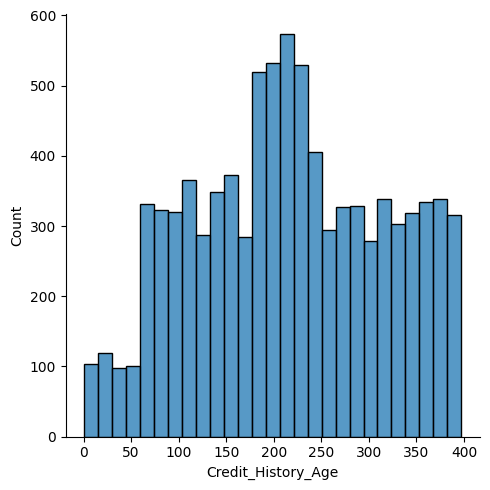

In [58]:
sns.displot(credit_df['Credit_History_Age'])

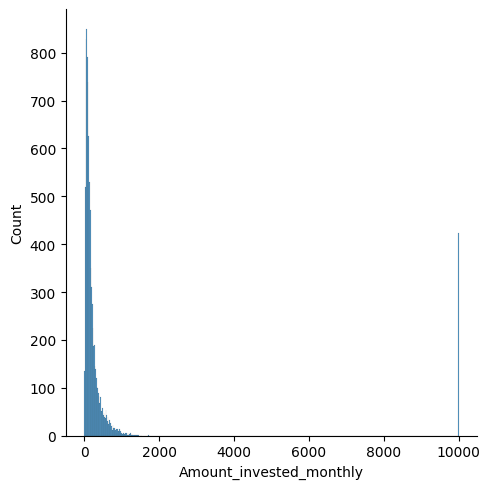

In [59]:
sns.displot(credit_df['Amount_invested_monthly'])

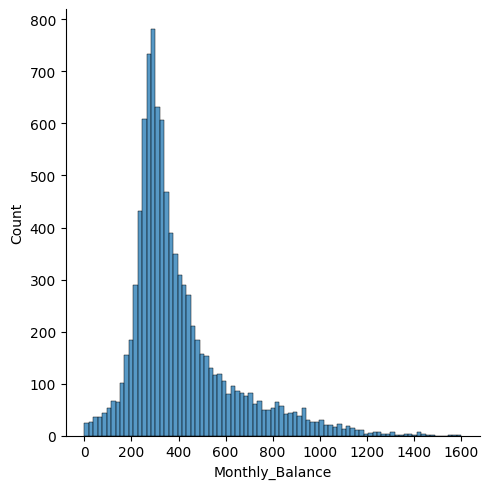

In [60]:
sns.displot(credit_df['Monthly_Balance'])

In [61]:
credit_df = credit_df.fillna(credit_df.median())

<ipython-input-61-98962993b203>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_df = credit_df.fillna(credit_df.median())


In [62]:
credit_df.isna().mean()

Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Num_Credit_Inquiries        0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

# 텍스트 데이터 변환

In [63]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


In [64]:
credit_df['Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1                                      Credit-Builder Loan
2                  Auto Loan, Auto Loan, and Not Specified
3                                            Not Specified
6                   Credit-Builder Loan, and Mortgage Loan
                               ...                        
12494    Student Loan, Debt Consolidation Loan, Student...
12495                                        Not Specified
12496    Payday Loan, Student Loan, Mortgage Loan, and ...
12497    Home Equity Loan, Mortgage Loan, and Student Loan
12498    Personal Loan, Auto Loan, Mortgage Loan, Stude...
Name: Type_of_Loan, Length: 9661, dtype: object

In [65]:
credit_df['Type_of_Loan'].str.split(', ')

0        [Auto Loan, Credit-Builder Loan, Personal Loan...
1                                    [Credit-Builder Loan]
2                [Auto Loan, Auto Loan, and Not Specified]
3                                          [Not Specified]
6                 [Credit-Builder Loan, and Mortgage Loan]
                               ...                        
12494    [Student Loan, Debt Consolidation Loan, Studen...
12495                                      [Not Specified]
12496    [Payday Loan, Student Loan, Mortgage Loan, and...
12497    [Home Equity Loan, Mortgage Loan, and Student ...
12498    [Personal Loan, Auto Loan, Mortgage Loan, Stud...
Name: Type_of_Loan, Length: 9661, dtype: object

In [66]:
credit_df['Type_of_Loan'].str.split(', ').sum()

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'and Home Equity Loan',
 'Credit-Builder Loan',
 'Auto Loan',
 'Auto Loan',
 'and Not Specified',
 'Not Specified',
 'Credit-Builder Loan',
 'and Mortgage Loan',
 'Not Specified',
 'and Payday Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'and Auto Loan',
 'Not Specified',
 'Student Loan',
 'and Personal Loan',
 'Personal Loan',
 'Payday Loan',
 'Student Loan',
 'Auto Loan',
 'Home Equity Loan',
 'Student Loan',
 'and Payday Loan',
 'Not Specified',
 'Student Loan',
 'Student Loan',
 'Credit-Builder Loan',
 'and Auto Loan',
 'Payday Loan',
 'and Home Equity Loan',
 'No_Loan',
 'Credit-Builder Loan',
 'Not Specified',
 'Mortgage Loan',
 'Payday Loan',
 'Credit-Builder Loan',
 'and Personal Loan',
 'No_Loan',
 'No_Loan',
 'No_Loan',
 'Payday Loan',
 'Not Specified',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Payday Loan',
 'Not Specified',
 'Student Loan',
 'and Student Loan',
 'Home Equity Loan',
 'Credit-Builder Lo

In [67]:
#set([1,2,3,4,4,5,5,7])

In [68]:
set(credit_df['Type_of_Loan'].str.split(', ').sum())

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No_Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan',
 'and Auto Loan',
 'and Credit-Builder Loan',
 'and Debt Consolidation Loan',
 'and Home Equity Loan',
 'and Mortgage Loan',
 'and Not Specified',
 'and Payday Loan',
 'and Personal Loan',
 'and Student Loan'}

In [69]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.replace('and ','')

In [70]:
type_list = set(credit_df['Type_of_Loan'].str.split(', ').sum())

In [71]:
#검증
'x' in ['a','b','c']

False

In [72]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.split(', ')

In [73]:
for i in type_list:
    credit_df[i] = credit_df['Type_of_Loan'].apply(lambda x : 1 if i in x else 0)

In [74]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Personal Loan,Student Loan,Not Specified,Credit-Builder Loan,Mortgage Loan,No_Loan,Auto Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan
0,23,Scientist,19114.12,3,4,3,4,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,1,0,0,1,0,0,1,1,0,0
1,28,_______,34847.84,2,4,6,1,[Credit-Builder Loan],3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,0,0,0,1,0,0,0,0,0,0
2,34,_______,143162.64,1,5,8,3,"[Auto Loan, Auto Loan, Not Specified]",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2,0,0,1,0,0,0,1,0,0,0
3,54,Entrepreneur,30689.89,2,5,4,1,[Not Specified],0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1,0,0,1,0,0,0,0,0,0,0
6,33,Lawyer,131313.40,0,1,8,2,"[Credit-Builder Loan, Mortgage Loan]",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2,0,0,0,1,1,0,0,0,0,0


In [75]:
credit_df.drop('Type_of_Loan', axis=1, inplace=True)

In [76]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9661 entries, 0 to 12498
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9661 non-null   int64  
 1   Occupation                9661 non-null   object 
 2   Annual_Income             9661 non-null   float64
 3   Num_Bank_Accounts         9661 non-null   int64  
 4   Num_Credit_Card           9661 non-null   int64  
 5   Interest_Rate             9661 non-null   int64  
 6   Num_of_Loan               9661 non-null   int64  
 7   Delay_from_due_date       9661 non-null   int64  
 8   Num_of_Delayed_Payment    9661 non-null   float64
 9   Num_Credit_Inquiries      9661 non-null   float64
 10  Outstanding_Debt          9661 non-null   float64
 11  Credit_Utilization_Ratio  9661 non-null   float64
 12  Credit_History_Age        9661 non-null   float64
 13  Payment_of_Min_Amount     9661 non-null   object 
 14  Total_E

In [77]:
credit_df['Occupation'].value_counts()

_______          655
Lawyer           646
Mechanic         627
Engineer         617
Scientist        609
Architect        607
Developer        604
Teacher          603
Entrepreneur     596
Musician         594
Journalist       593
Accountant       592
Media_Manager    589
Doctor           588
Manager          578
Writer           563
Name: Occupation, dtype: int64

In [78]:
credit_df['Occupation'] = credit_df['Occupation'].replace('_______','Unknown')

In [79]:
credit_df['Occupation'].value_counts()

Unknown          655
Lawyer           646
Mechanic         627
Engineer         617
Scientist        609
Architect        607
Developer        604
Teacher          603
Entrepreneur     596
Musician         594
Journalist       593
Accountant       592
Media_Manager    589
Doctor           588
Manager          578
Writer           563
Name: Occupation, dtype: int64

In [80]:
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2406
High_spent_Medium_value_payments    1743
High_spent_Large_value_payments     1407
Low_spent_Medium_value_payments     1334
High_spent_Small_value_payments     1098
Low_spent_Large_value_payments       955
!@9#%8                               718
Name: Payment_Behaviour, dtype: int64

In [81]:
credit_df['Payment_Behaviour'] = credit_df['Payment_Behaviour'].replace('!@9#%8','Unknown')

In [82]:
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2406
High_spent_Medium_value_payments    1743
High_spent_Large_value_payments     1407
Low_spent_Medium_value_payments     1334
High_spent_Small_value_payments     1098
Low_spent_Large_value_payments       955
Unknown                              718
Name: Payment_Behaviour, dtype: int64

# 더미 변수 만들기

In [83]:
credit_df = pd.get_dummies(credit_df,columns=['Occupation','Payment_of_Min_Amount','Payment_Behaviour'])

In [84]:
credit_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Personal Loan,Student Loan,Not Specified,Credit-Builder Loan,Mortgage Loan,No_Loan,Auto Loan,Home Equity Loan,Payday Loan,...,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,23,19114.12,3,4,3,4,3,7.0,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,28,34847.84,2,4,6,1,3,4.0,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,34,143162.64,1,5,8,3,5,8.0,3.0,1303.01,28.616735,213.0,246.992320,168.413703,1043.315978,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,54,30689.89,2,5,4,1,0,6.0,4.0,632.46,26.544229,207.0,16.415452,81.228859,433.604773,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,33,131313.40,0,1,8,2,0,3.0,2.0,352.16,32.200509,367.0,137.644605,378.171253,858.462474,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# 모델링

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(credit_df.drop('Credit_Score',axis=1),credit_df['Credit_Score'],test_size = 0.25, random_state=100)

In [87]:
from lightgbm import LGBMClassifier

In [88]:
base_model = LGBMClassifier(random_state=100)

In [89]:
base_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 7245, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575195
[LightGBM] [Info] Start training from score -1.910786


LGBMClassifier(random_state=100)

In [90]:
pred1 = base_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [92]:
accuracy_score(y_test, pred1)

0.7363410596026491

In [93]:
confusion_matrix(y_test, pred1)

array([[ 516,  170,   36],
       [ 163, 1036,  123],
       [   7,  138,  227]])

In [94]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       722
           1       0.77      0.78      0.78      1322
           2       0.59      0.61      0.60       372

    accuracy                           0.74      2416
   macro avg       0.70      0.70      0.70      2416
weighted avg       0.74      0.74      0.74      2416



In [95]:
proba1 = base_model.predict_proba(X_test)

In [96]:
proba1

array([[1.24961126e-01, 8.28303695e-01, 4.67351788e-02],
       [3.78914627e-01, 6.20630516e-01, 4.54856490e-04],
       [6.65814223e-01, 3.33991635e-01, 1.94142245e-04],
       ...,
       [7.27858771e-01, 2.71971844e-01, 1.69385460e-04],
       [1.26486967e-01, 3.41079419e-01, 5.32433614e-01],
       [8.07397950e-01, 1.92355843e-01, 2.46207167e-04]])

In [97]:
#roc_auc_score(y_test, proba1)

In [98]:
roc_auc_score(y_test, proba1,multi_class='ovr') # or 'ovo'

#ovr의 경우 imbalance 데이터에 더 민감하게 반응 372가 그렇게 작은 비율은 아님.

0.9039833638520278

# Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [100]:
params = {'n_estimators': [100,300,500,1000], # 몇개의 트리?
          'max_depth':[-1, 10, 30, 50]} # 최대 깊이

In [101]:
lgbm = LGBMClassifier(random_state=100)

In [102]:
grid_igbm = GridSearchCV(lgbm, params, cv = 3)

In [103]:
grid_igbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 4830, number of used features: 51
[LightGBM] [Info] Start training from score -1.239804
[LightGBM] [Info] Start training from score -0.575318
[LightGBM] [Info] Start training from score -1.910319
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 4830, number of used features: 51
[LightGBM] [Info] Start training from 

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=100),
             param_grid={'max_depth': [-1, 10, 30, 50],
                         'n_estimators': [100, 300, 500, 1000]})

In [104]:
grid_igbm.best_params_

{'max_depth': -1, 'n_estimators': 100}

In [105]:
proba2 = grid_igbm.predict_proba(X_test)

In [106]:
roc_auc_score(y_test, proba2, multi_class= 'ovr')

0.9039833638520278

In [107]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth' : [-1, 30, 560, 100],
    'num_leaves' : [5,10,20,50],
    'learning_rate' : [0.01,0.05,0.1,0.5]
}

In [108]:
rand_lgbm = RandomizedSearchCV(lgbm, params, cv=3, n_iter=30, random_state=100)

In [109]:
rand_lgbm.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=100), n_iter=30,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 560, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [111]:
rand_lgbm.best_params_

{'num_leaves': 5,
 'n_estimators': 1000,
 'max_depth': 560,
 'learning_rate': 0.01}

In [113]:
proba3 = rand_lgbm.predict_proba(X_test)

In [114]:
roc_auc_score(y_test, proba3, multi_class='ovr')

0.9078610200221102